In [1]:
%reload_ext autoreload
%autoreload 2

from npfd import data
from npfd.data.htk import read_data
from npfd import visualization as viz
import numpy as np

In [2]:
params = {'normalize': True,
            'data_version': '2',
            'init_metho': 'HCompV',
                                      
            # Labels
            'label_type': 'event-noevent',
            'nuc_threshold': 0.15,        # 1/cm3/10min
            'pos_vol_threshold': 200,     # 1/m3^3/10min
            'neg_vol_threshold': -5000,    # 1/cm3/10min
            'variance_floor': 2.0e-5,
            'minimum_variance': 1.98e-7,
                 
            'word_insertion_penalty': 0.0,
            'grammar_scale_factor': 0.0
       }  

params['raw_data_source'] = 'real'
X_train, X_test, y_train, y_test = data.dataset.make_dataset(params)


INFO:root:Converting real raw files to HTK format ...
/home/gfogwil/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8921: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...


In [3]:
with open(X_train['script_file']) as train_files_scp:
    train_files = train_files_scp.read().splitlines() 

with open(X_test['script_file']) as test_files_scp:
    test_files = test_files_scp.read().splitlines()
   

print('Número de archivos de entrenamiento: \t{}\nNúmero de archivos de evaluación: \t{}'.format(train_files.__len__(), test_files.__len__()))

Número de archivos de entrenamiento: 	255
Número de archivos de evaluación: 	15


In [4]:
import random
random.choice(test_files)

'/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170225'

In [11]:
for file in test_files:
    print(file)

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20171114
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20171215
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170225
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170523
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20171019
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170202
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170305
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170131
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real/20170317
/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/i

In [10]:
y_test

{'mlf': '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/dmps_test_labels.mlf',
 'count': None,
 'id': '.test.real'}

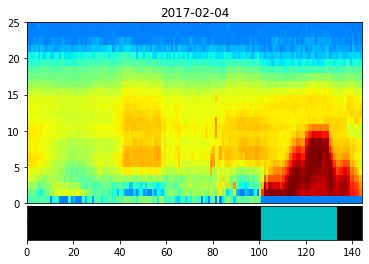

In [7]:
viz.visualize.plot_X_y1(random.choice(test_files), 'neuronales', y_test)

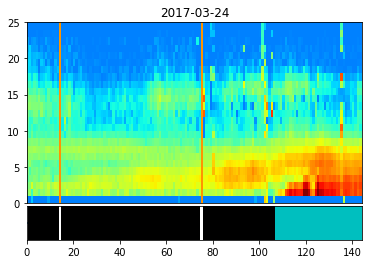

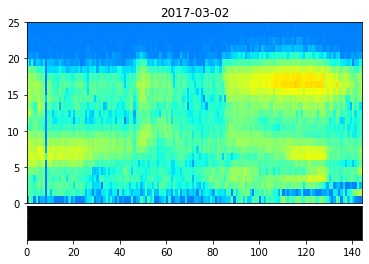

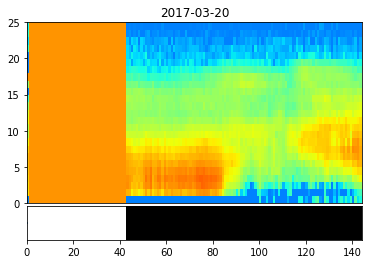

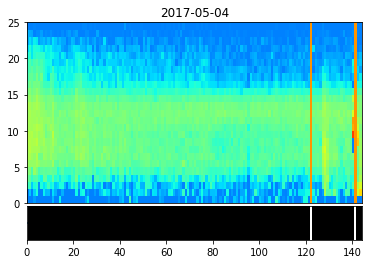

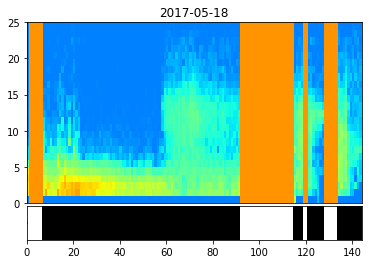

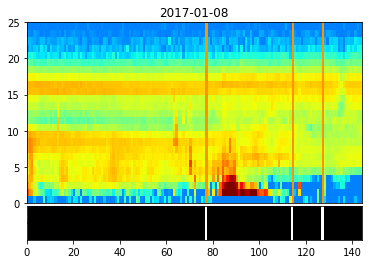

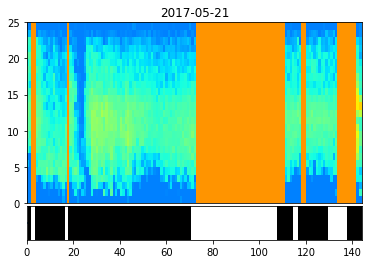

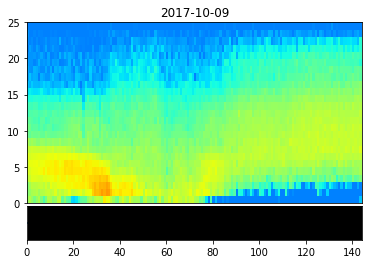

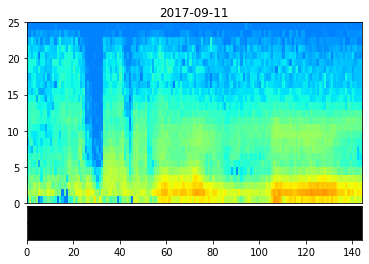

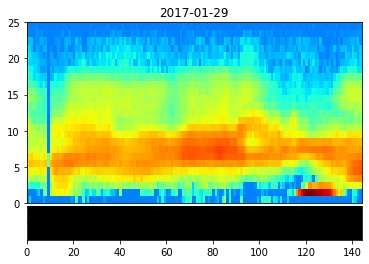

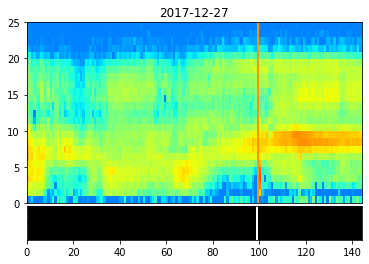

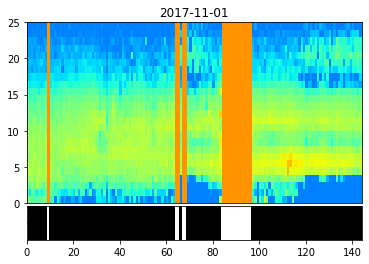

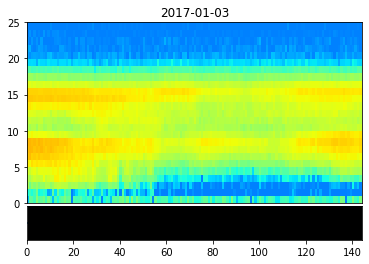

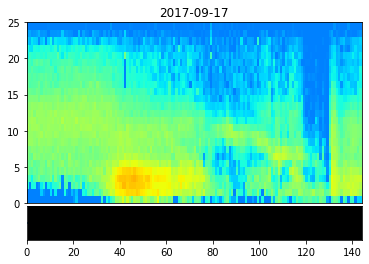

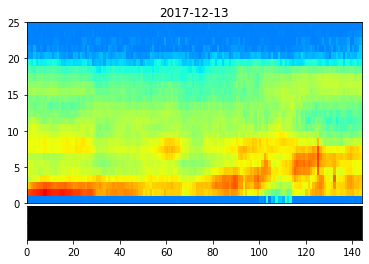

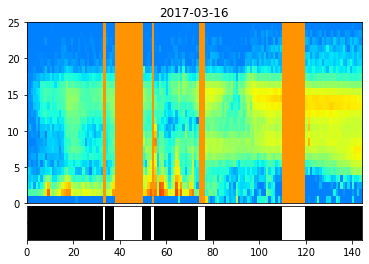

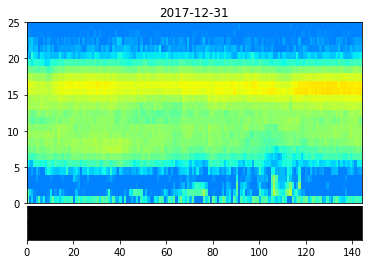

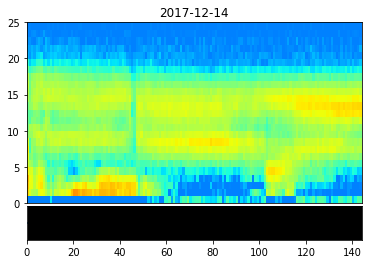

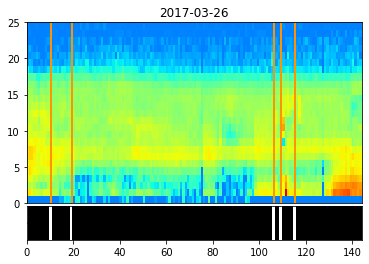

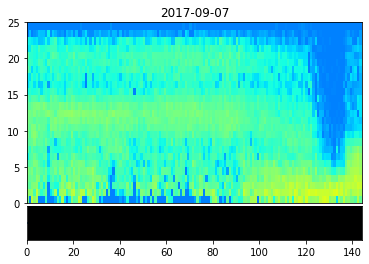

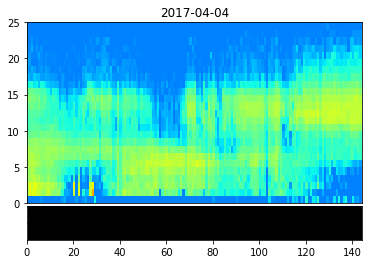

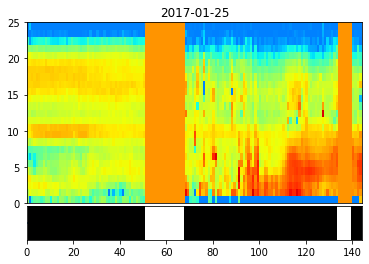

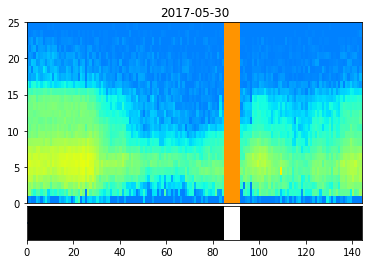

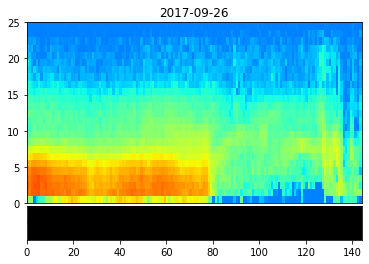

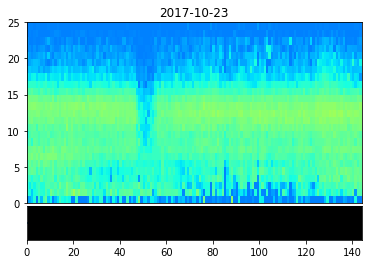

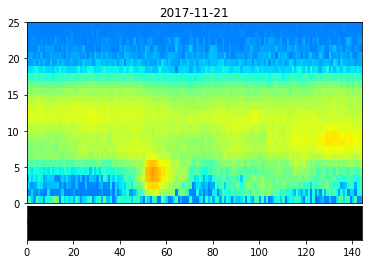

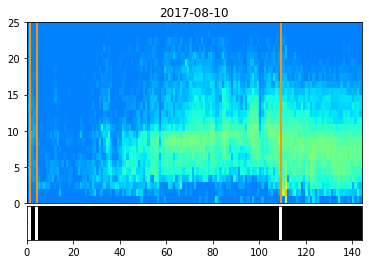

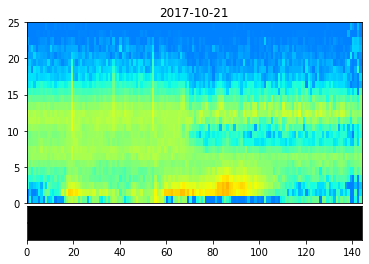

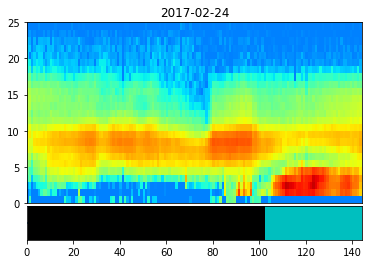

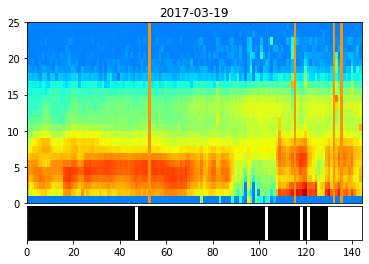

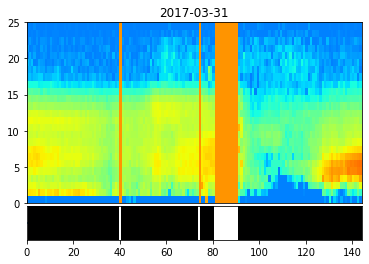

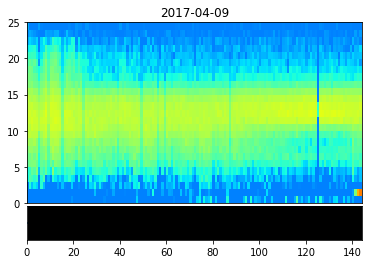

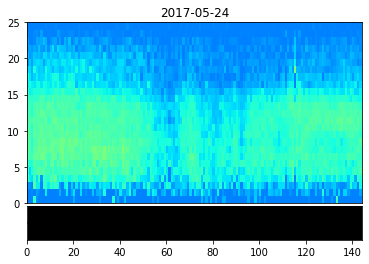

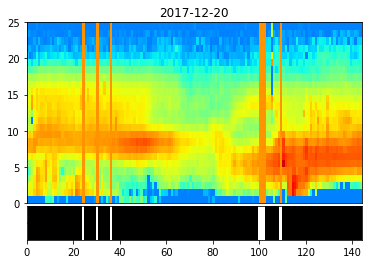

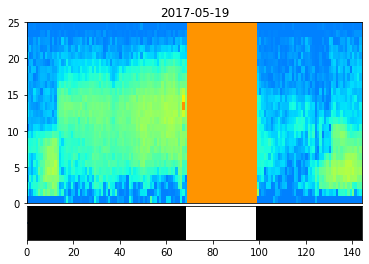

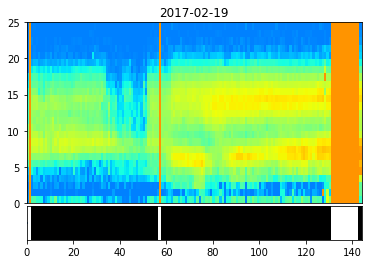

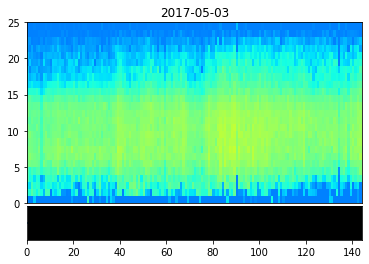

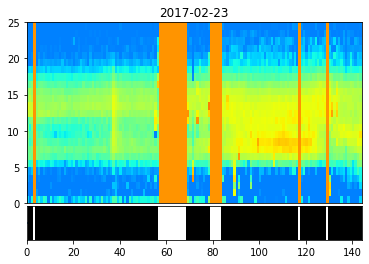

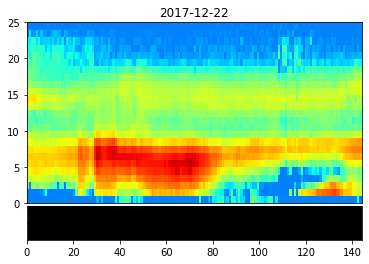

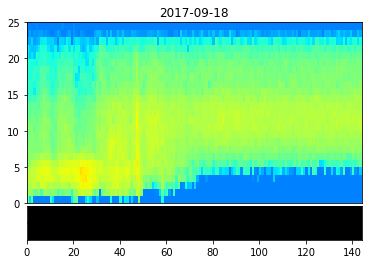

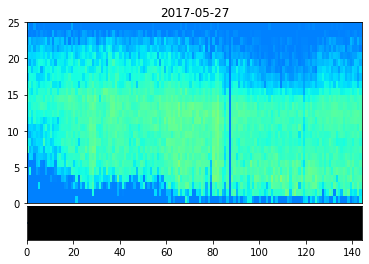

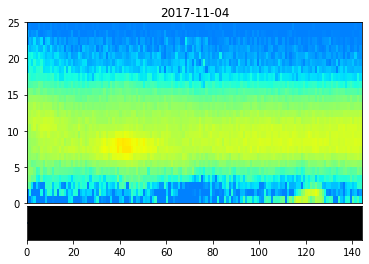

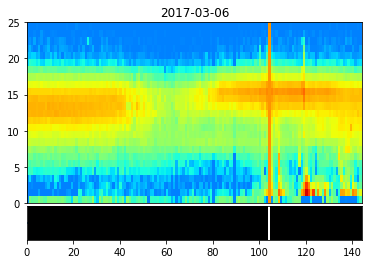

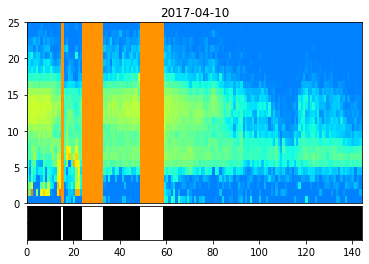

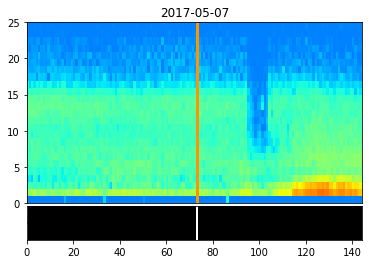

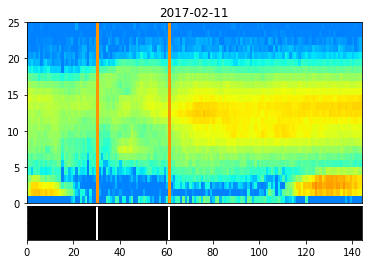

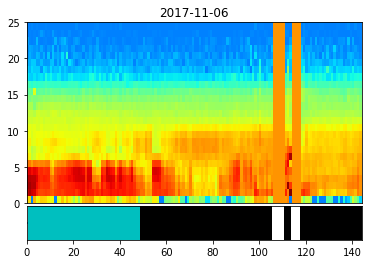

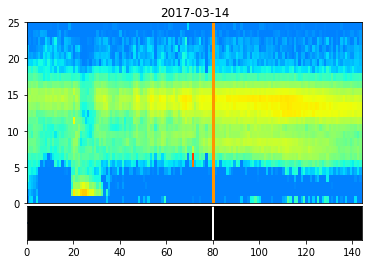

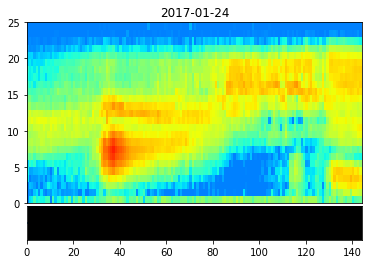

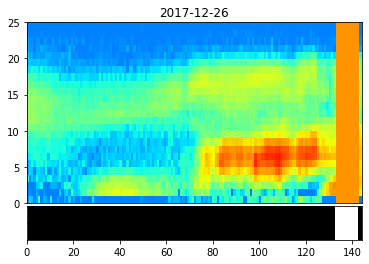

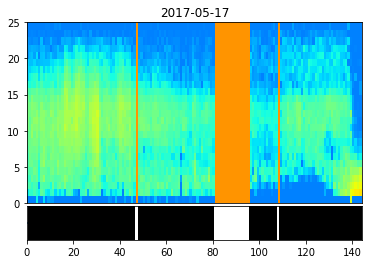

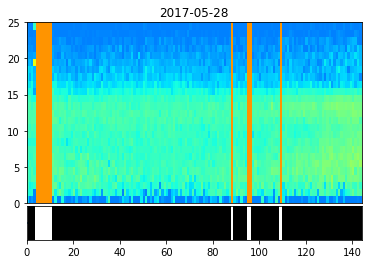

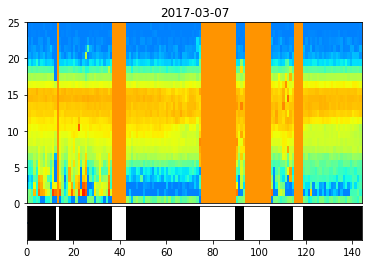

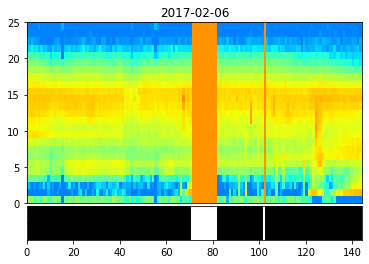

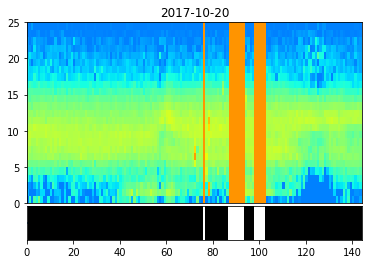

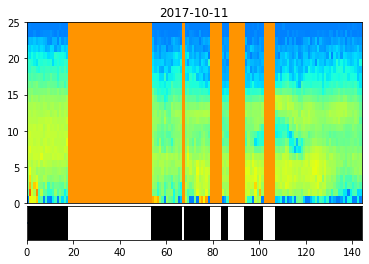

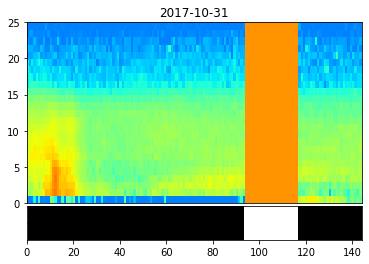

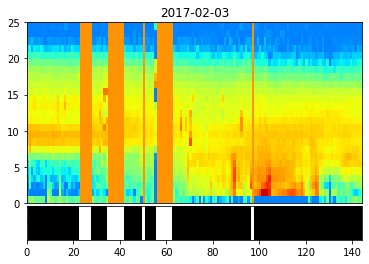

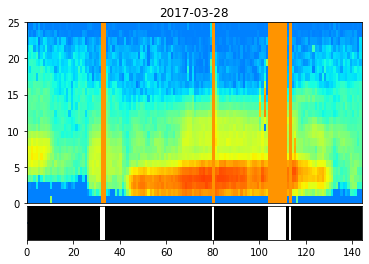

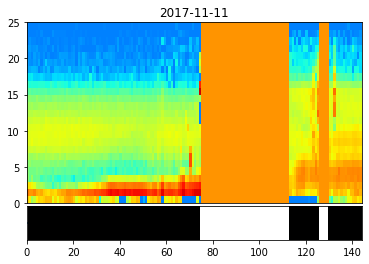

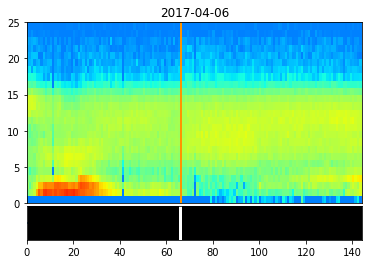

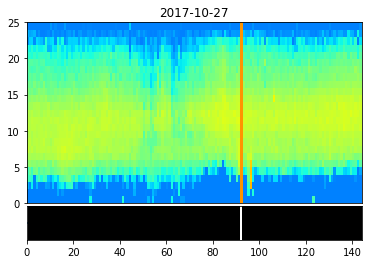

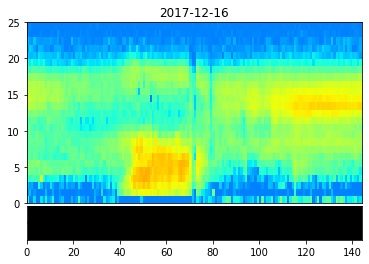

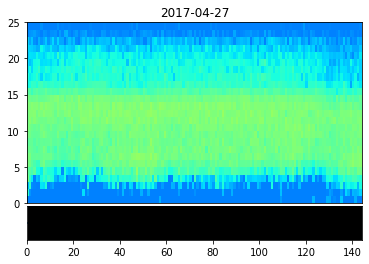

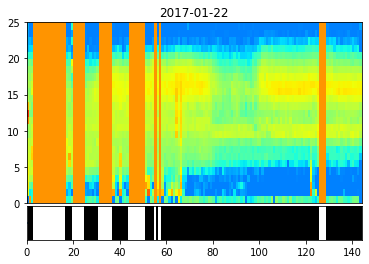

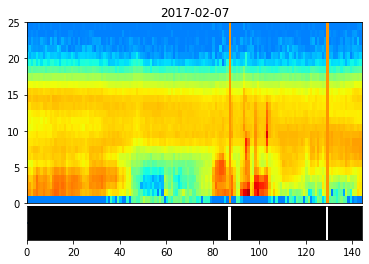

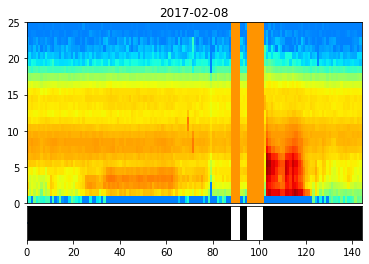

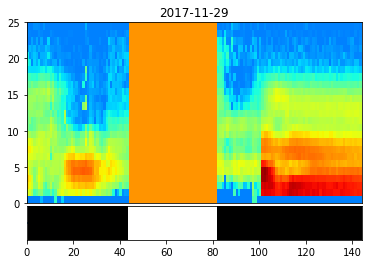

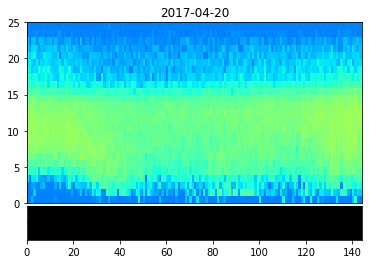

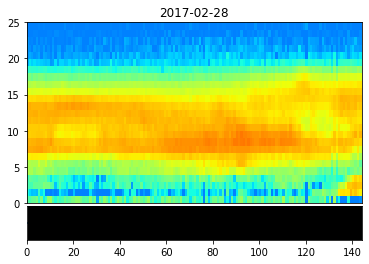

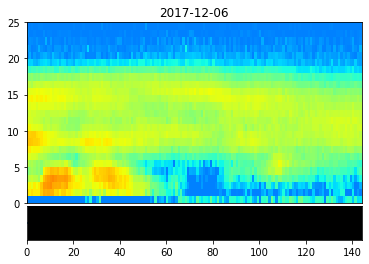

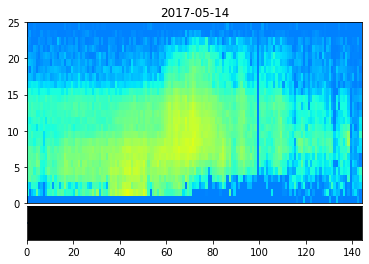

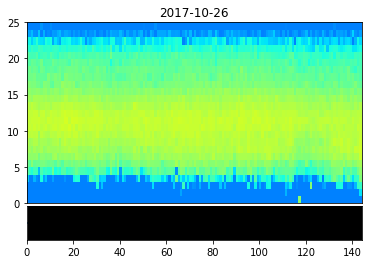

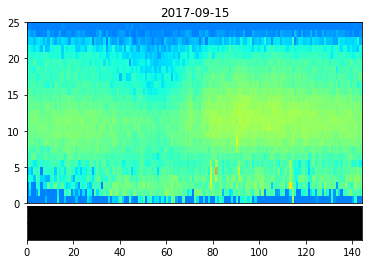

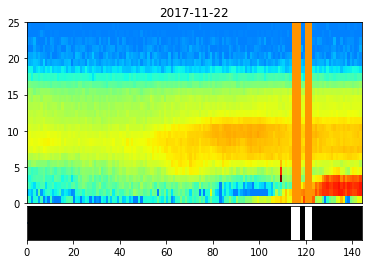

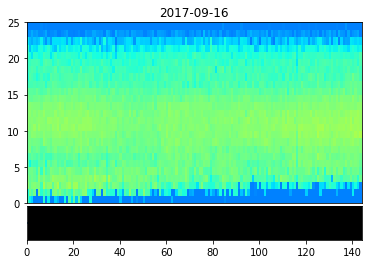

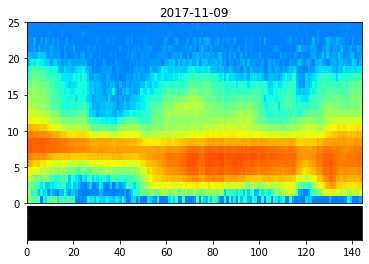

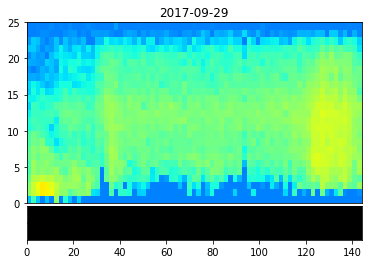

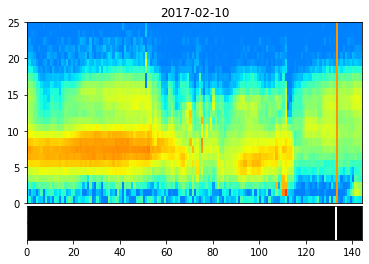

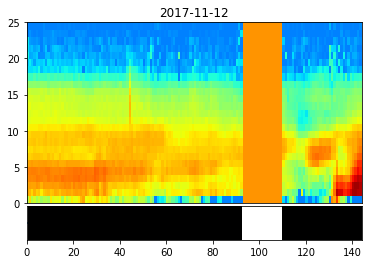

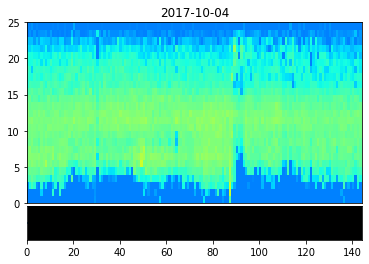

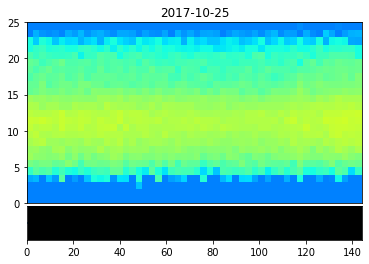

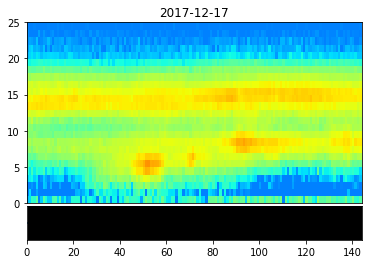

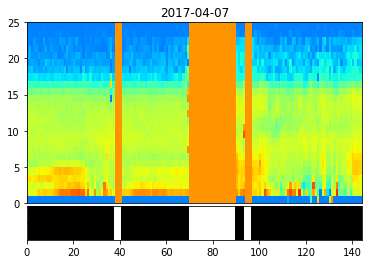

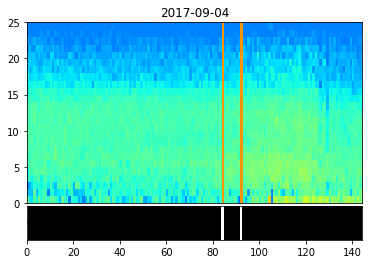

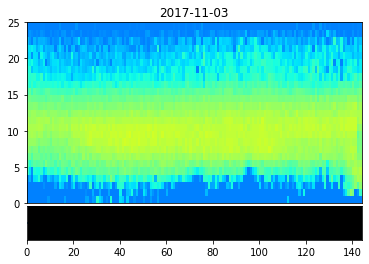

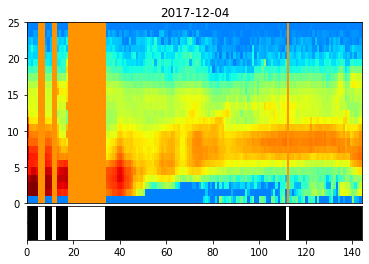

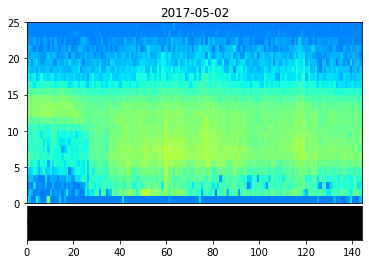

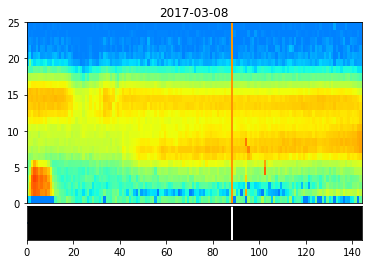

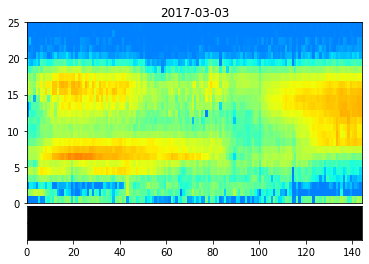

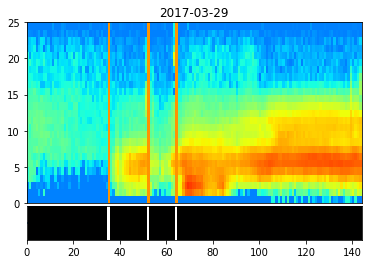

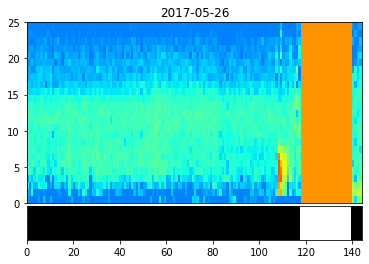

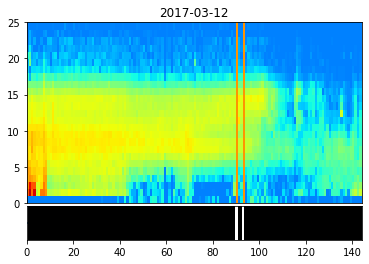

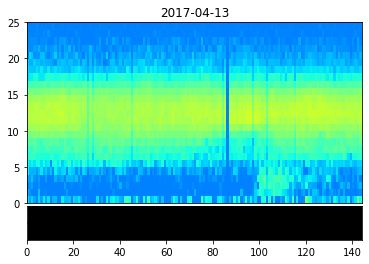

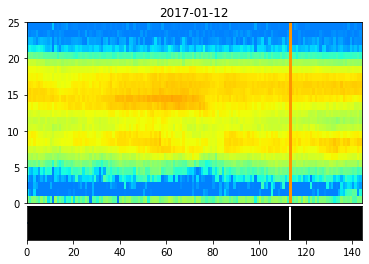

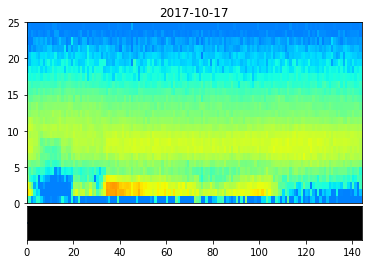

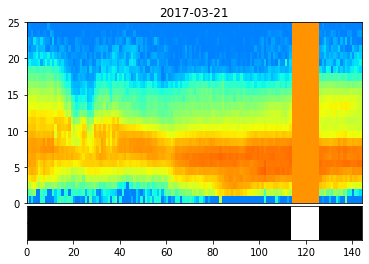

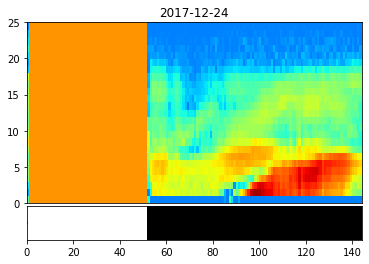

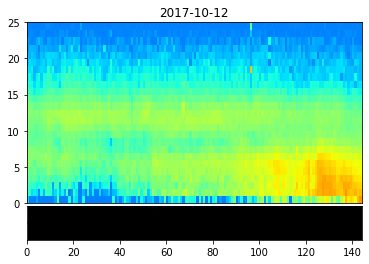

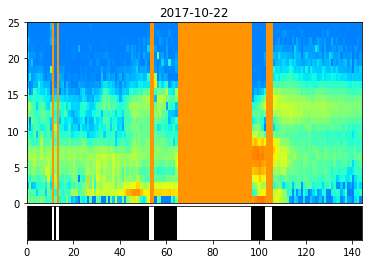

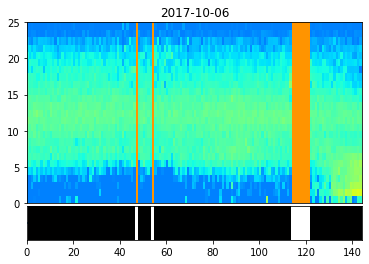

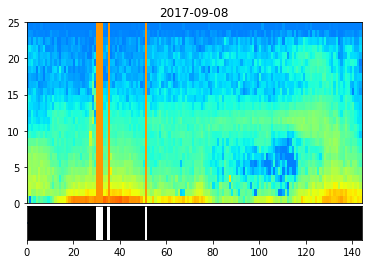

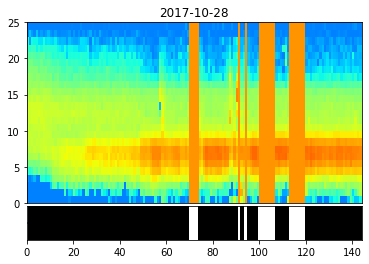

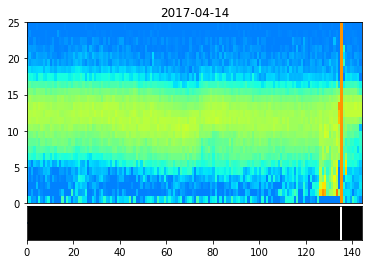

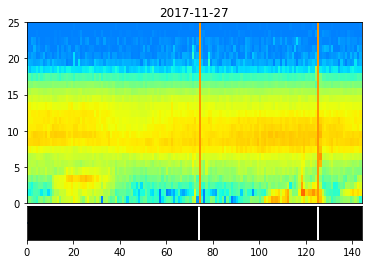

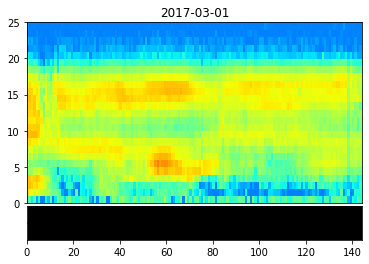

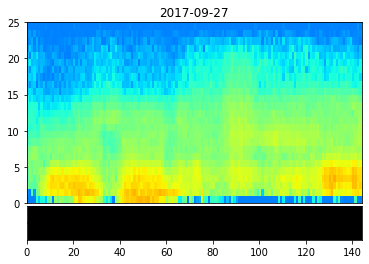

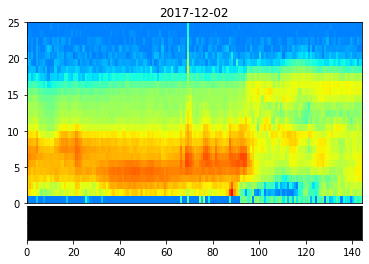

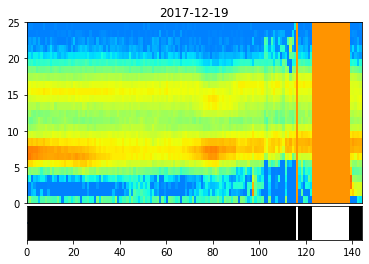

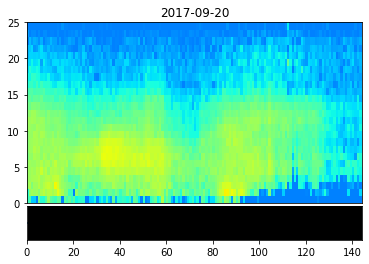

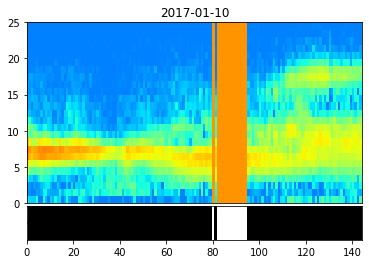

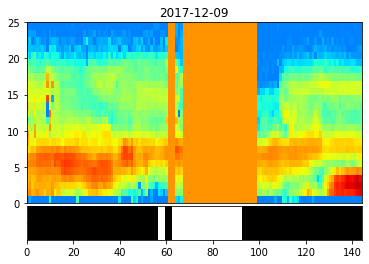

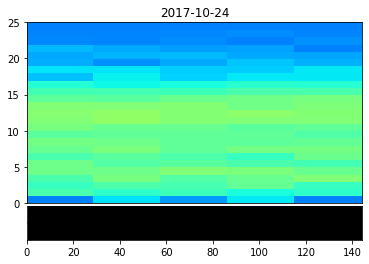

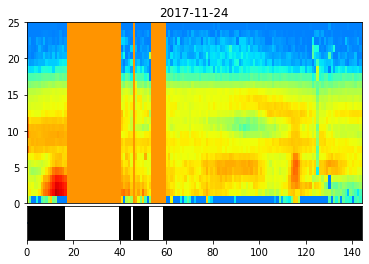

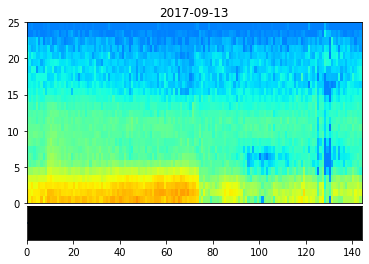

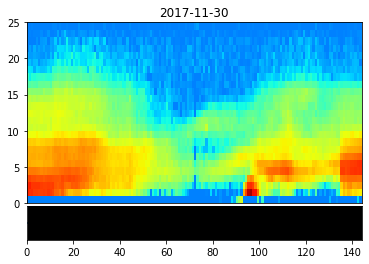

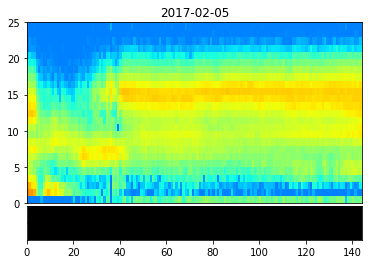

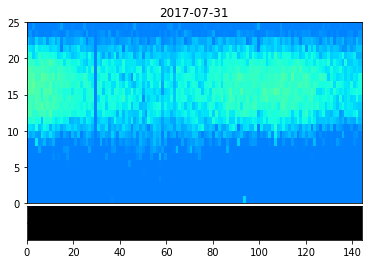

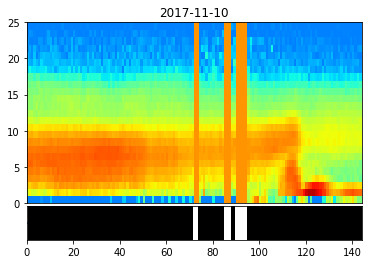

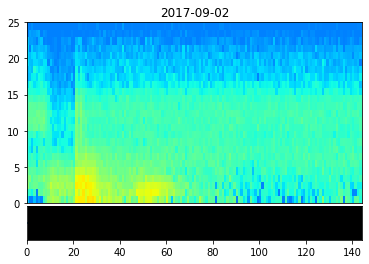

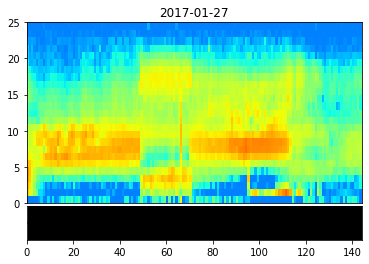

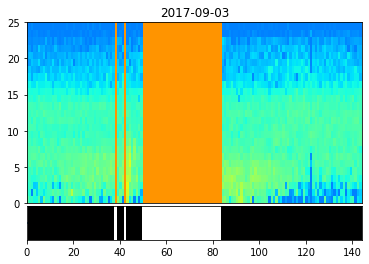

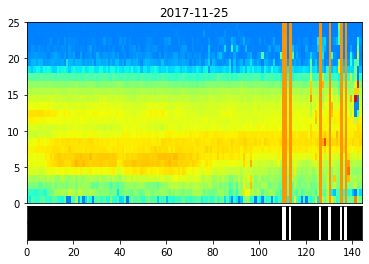

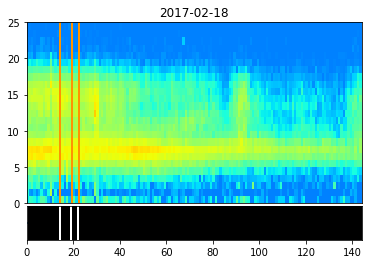

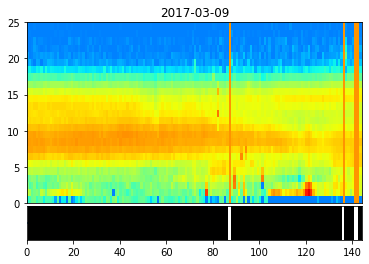

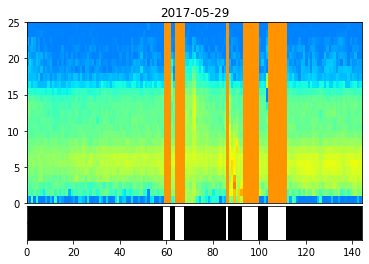

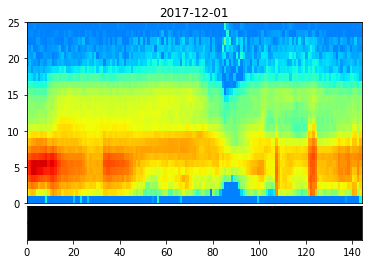

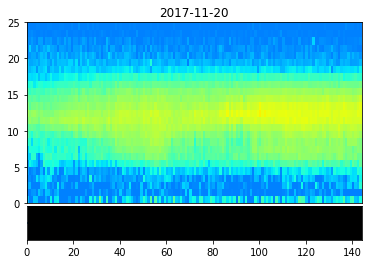

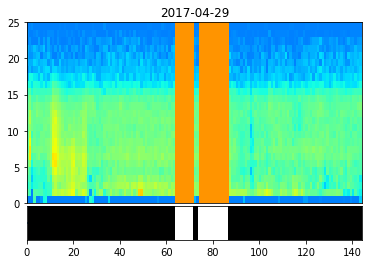

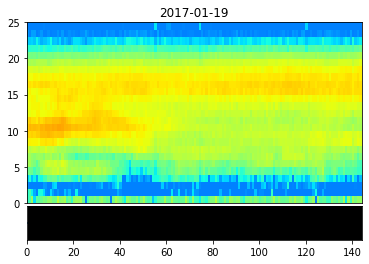

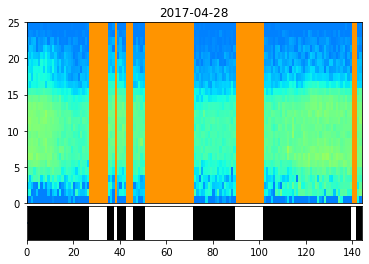

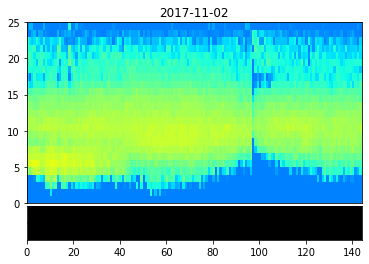

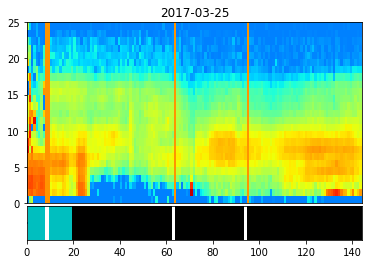

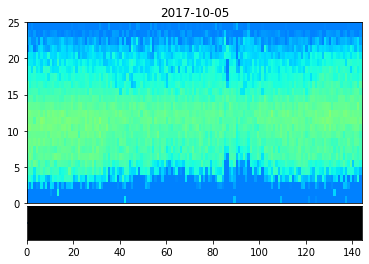

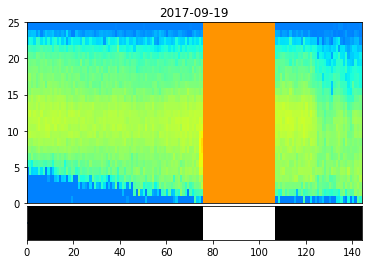

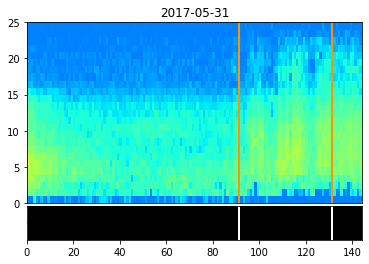

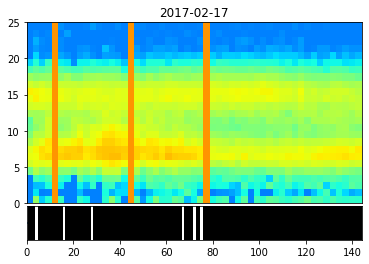

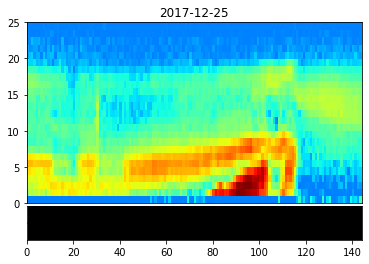

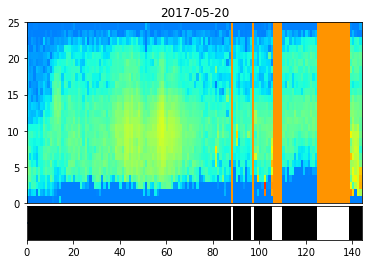

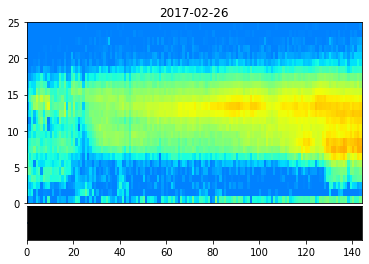

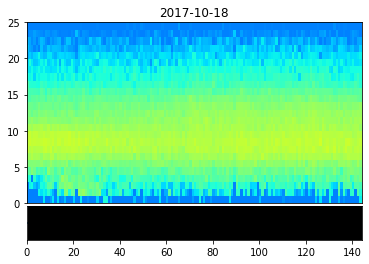

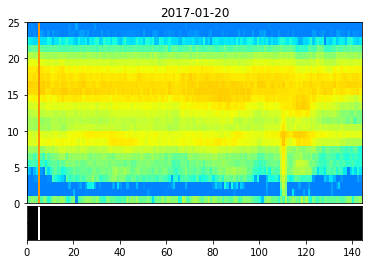

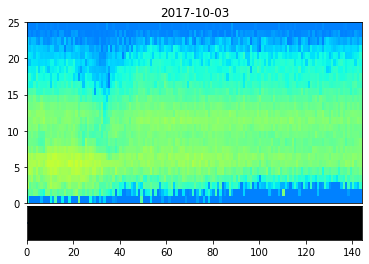

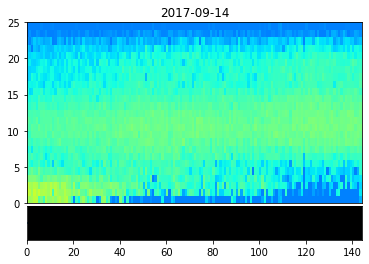

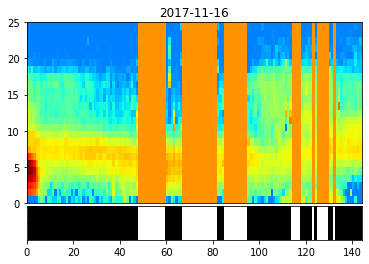

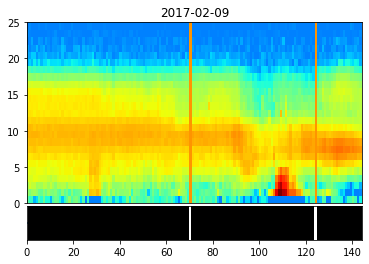

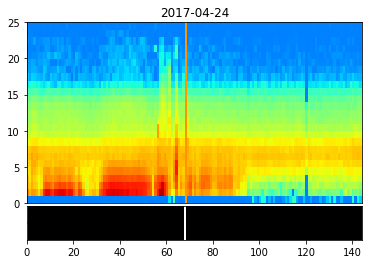

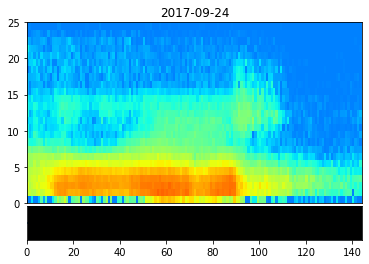

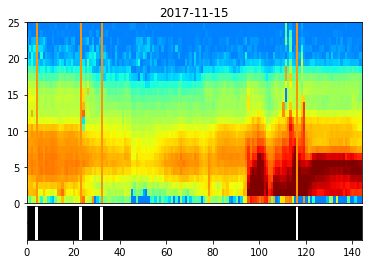

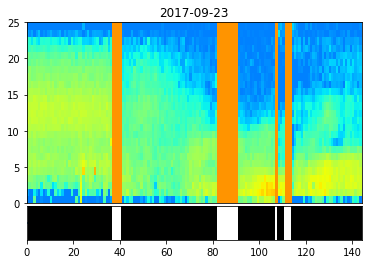

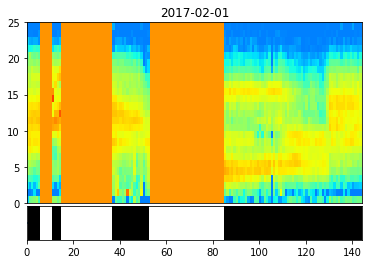

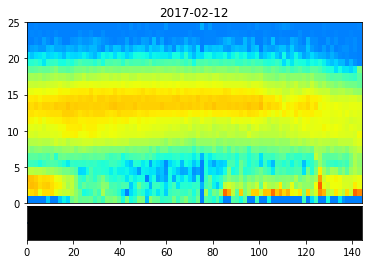

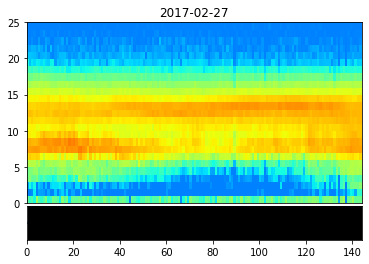

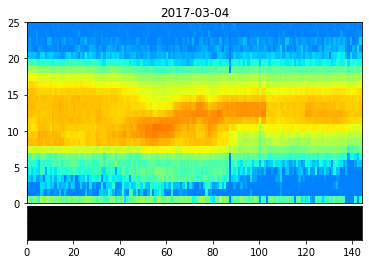

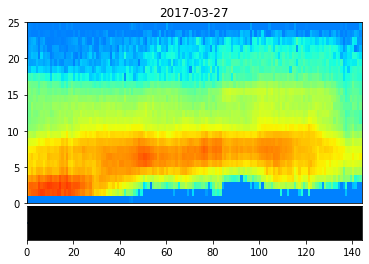

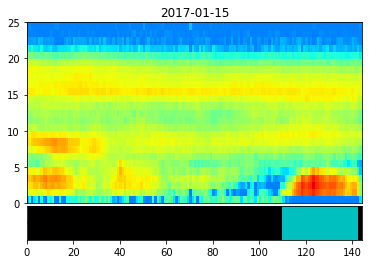

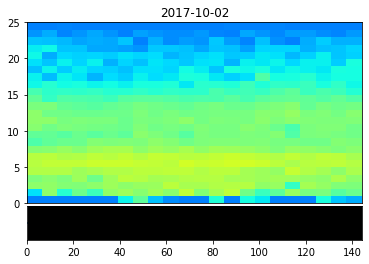

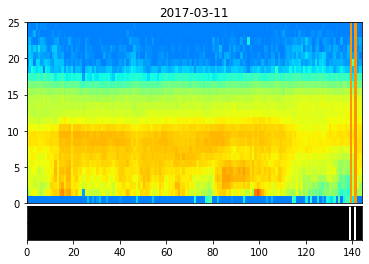

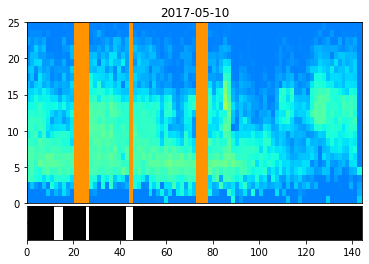

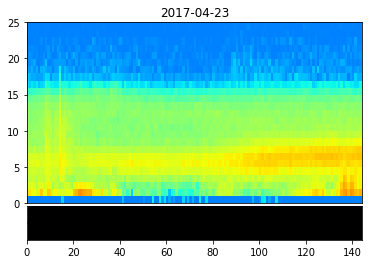

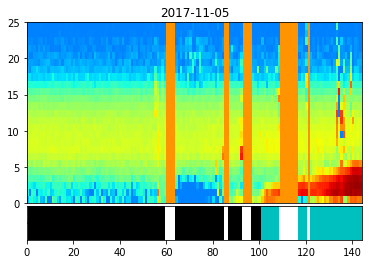

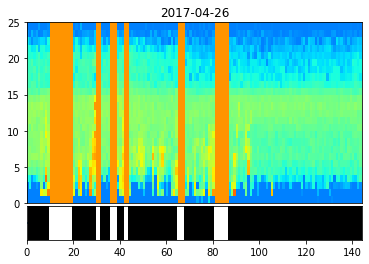

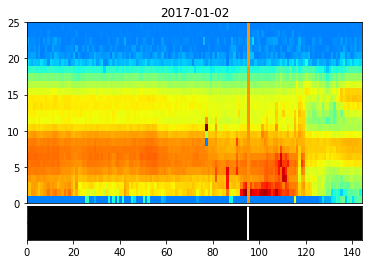

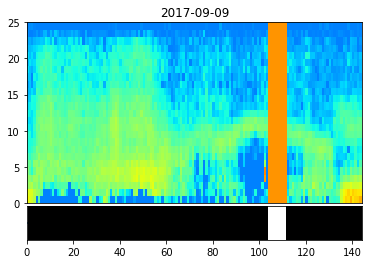

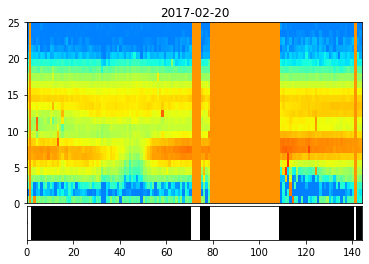

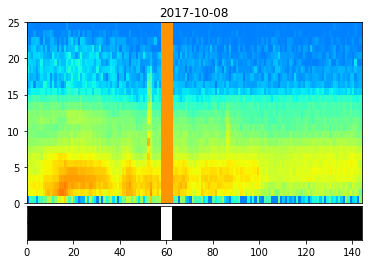

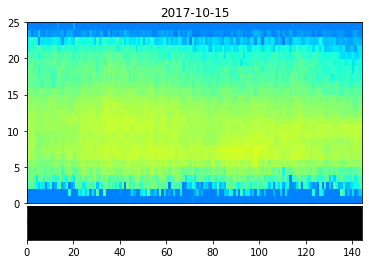

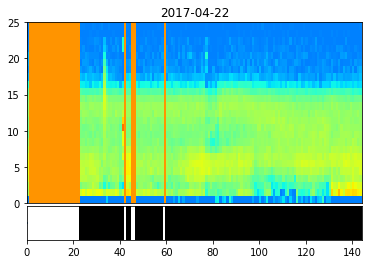

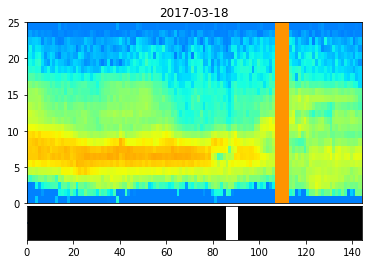

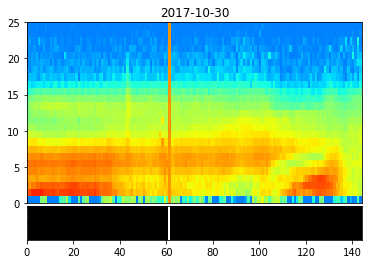

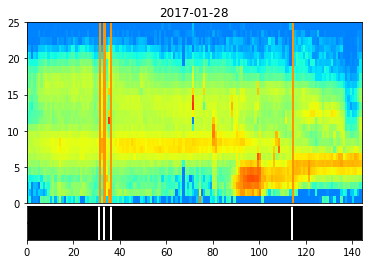

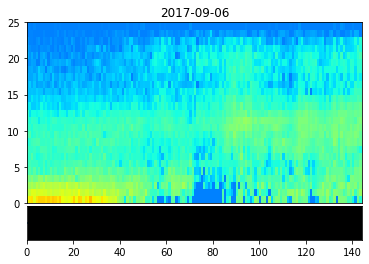

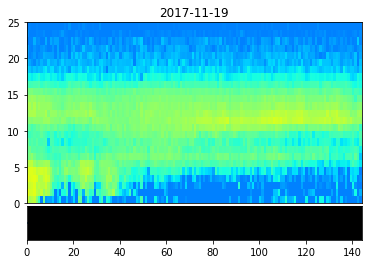

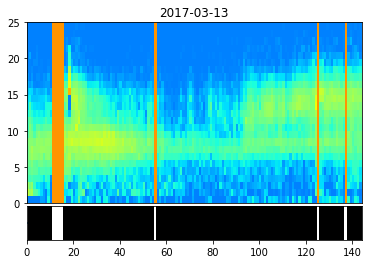

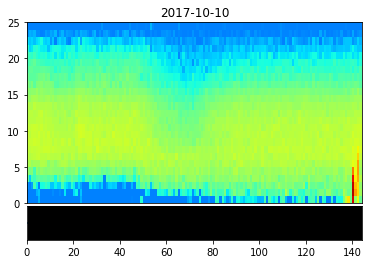

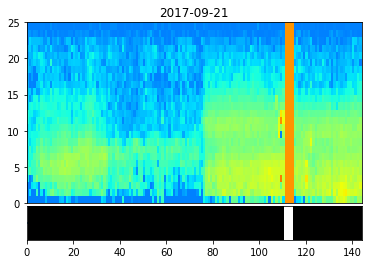

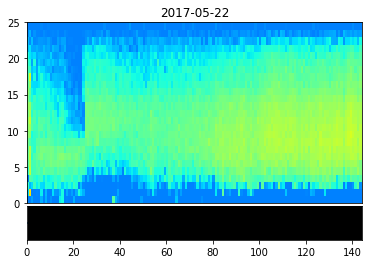

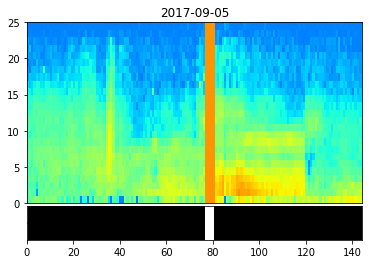

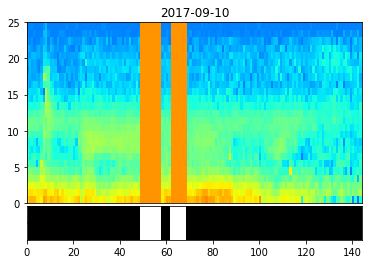

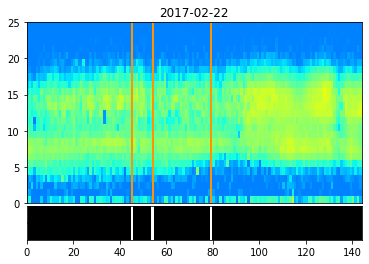

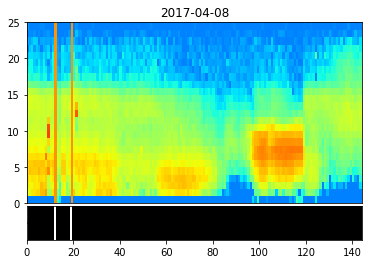

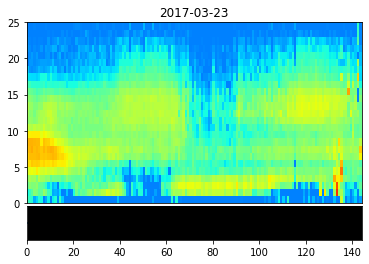

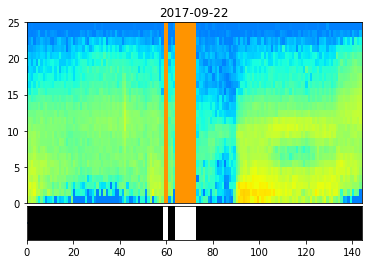

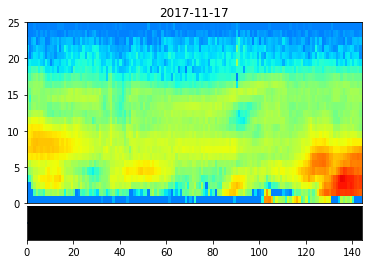

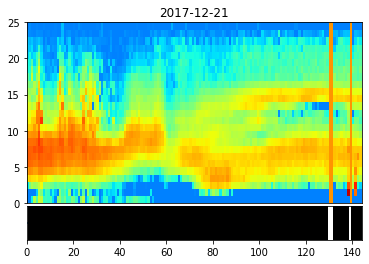

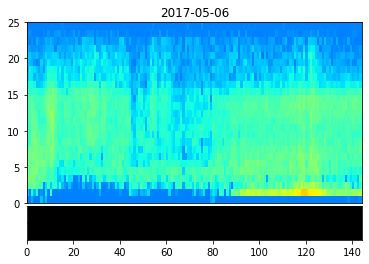

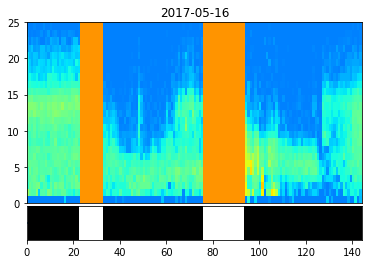

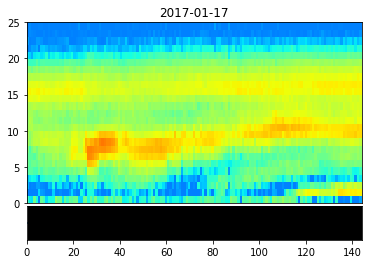

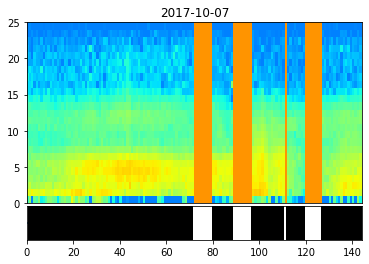

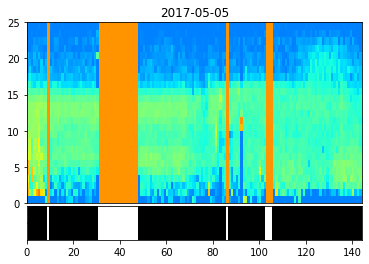

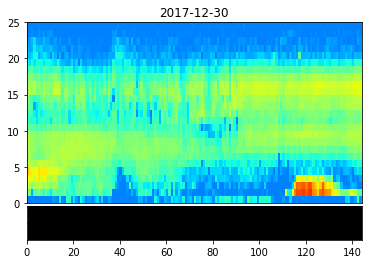

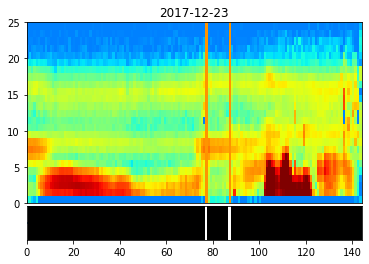

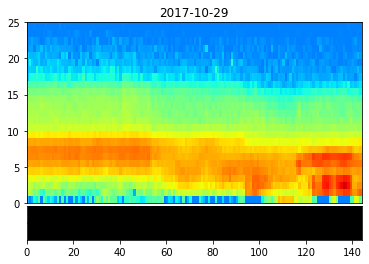

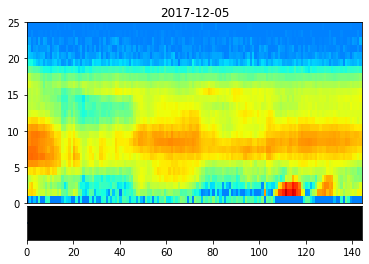

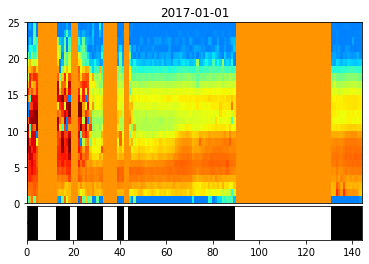

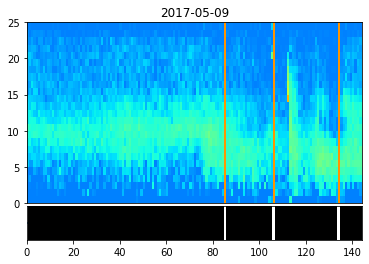

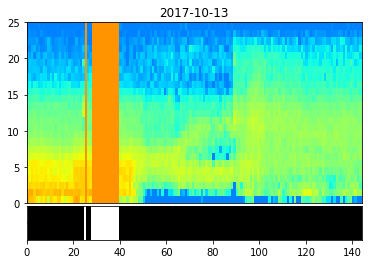

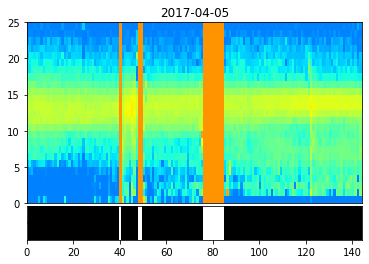

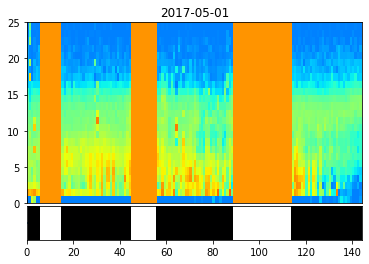

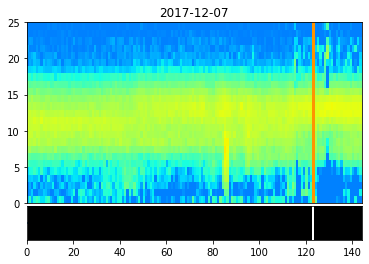

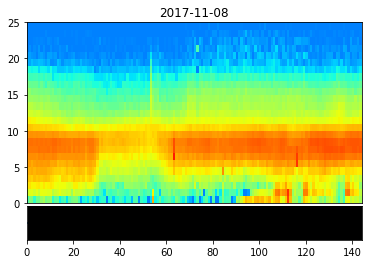

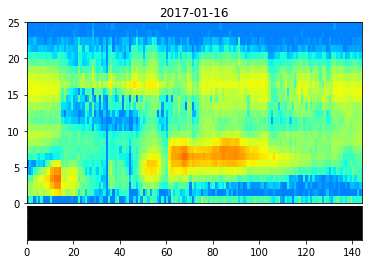

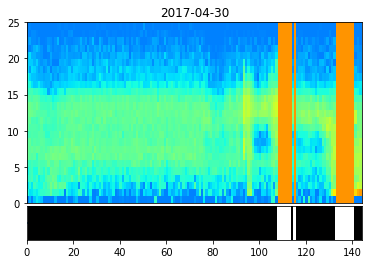

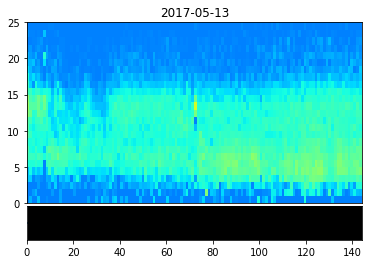

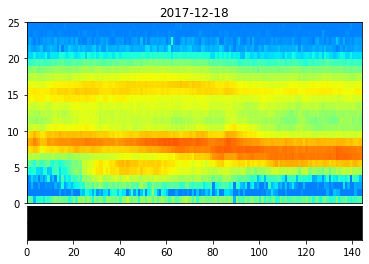

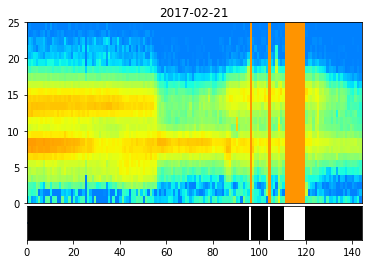

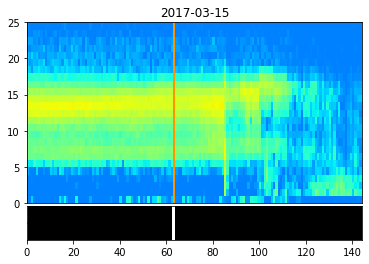

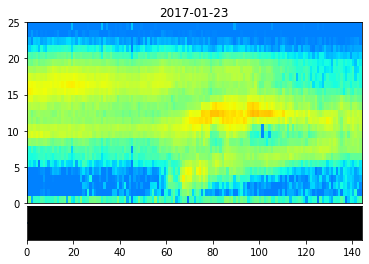

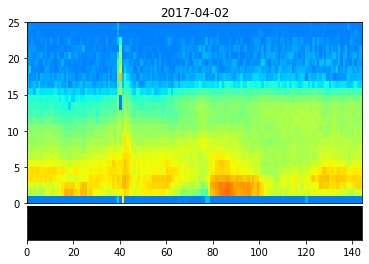

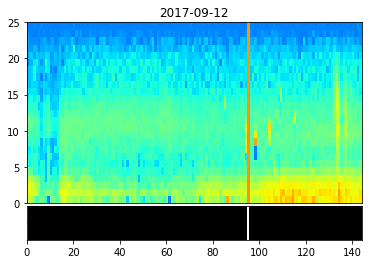

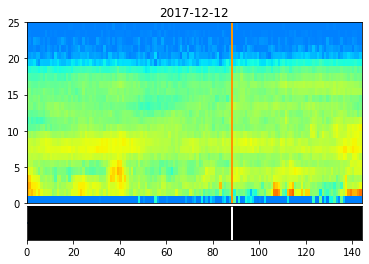

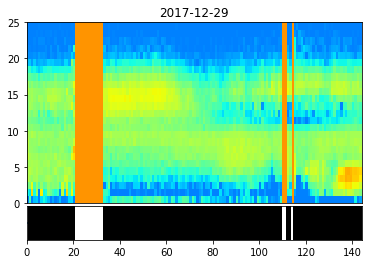

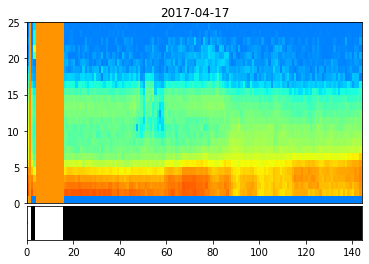

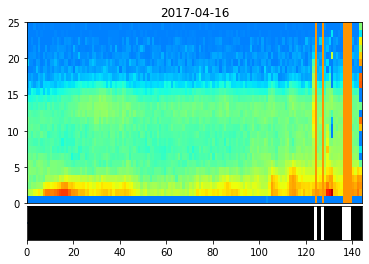

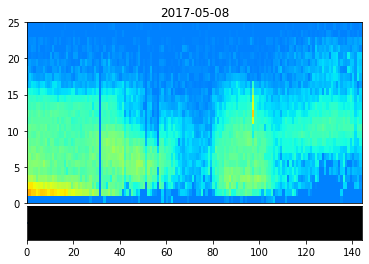

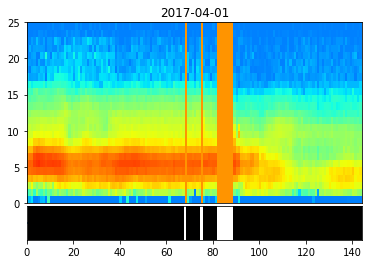

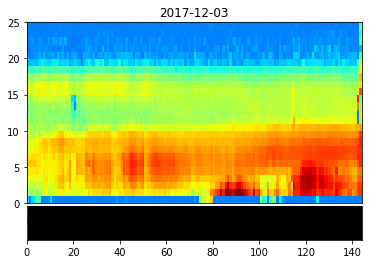

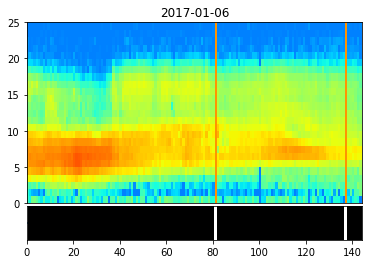

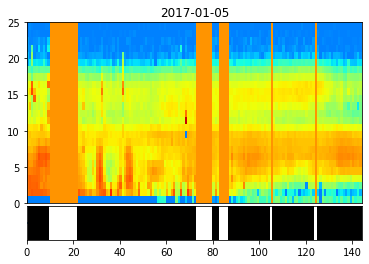

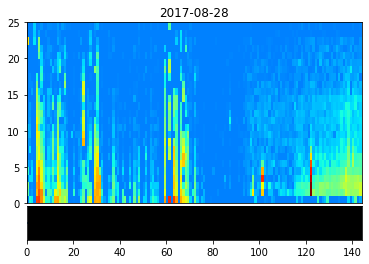

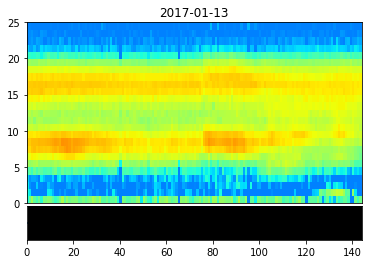

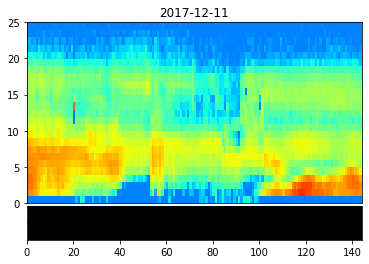

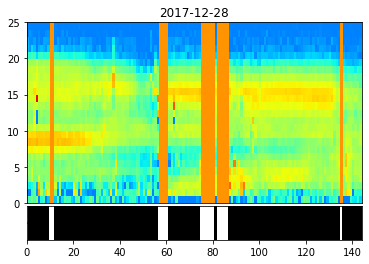

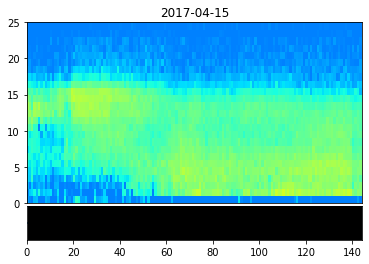

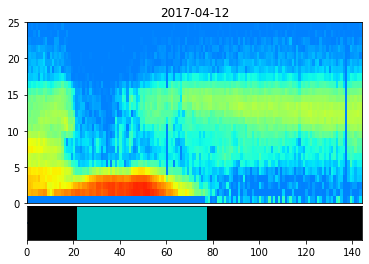

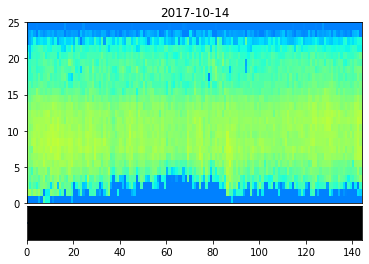

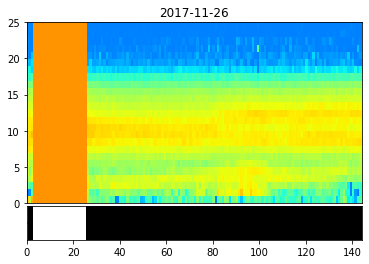

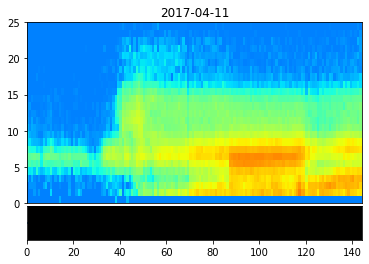

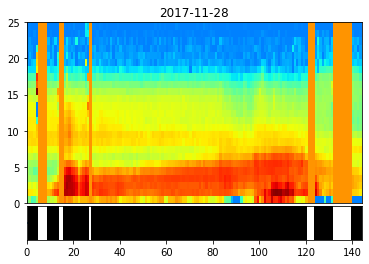

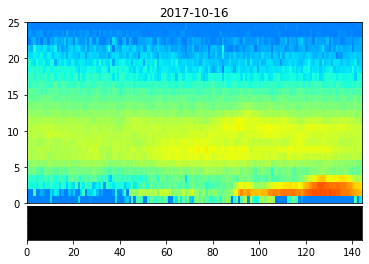

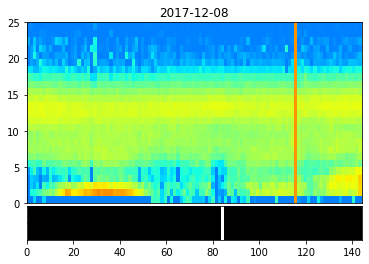

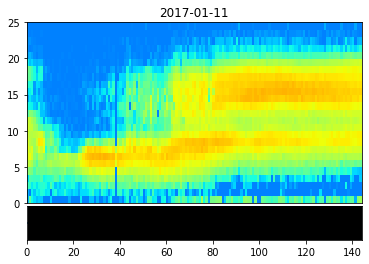

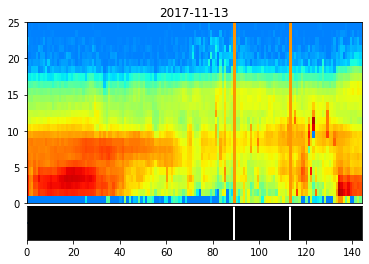

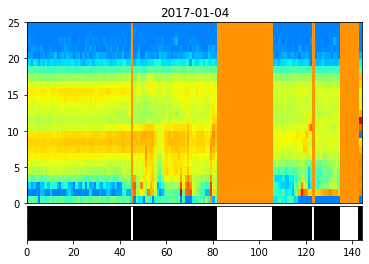

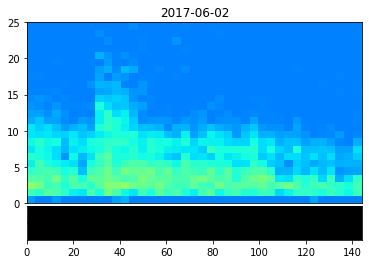

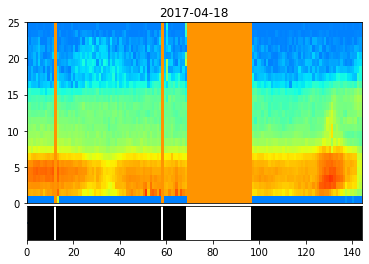

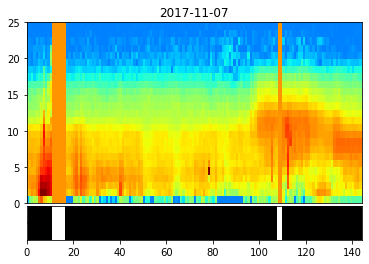

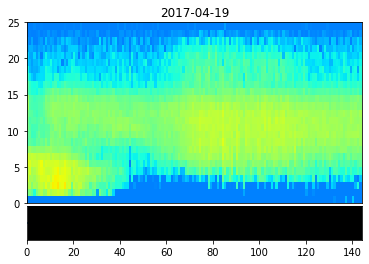

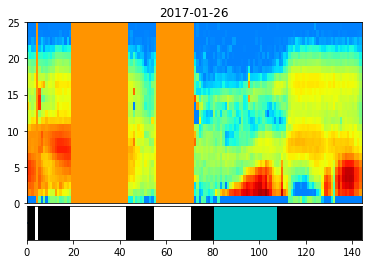

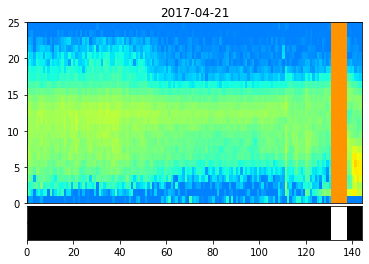

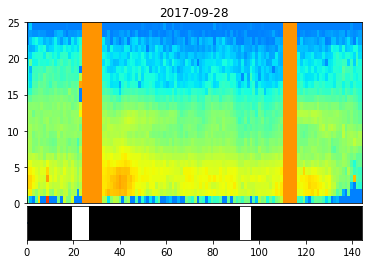

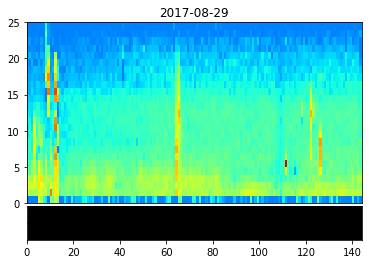

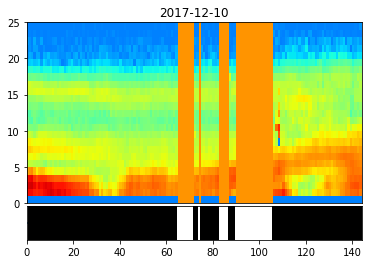

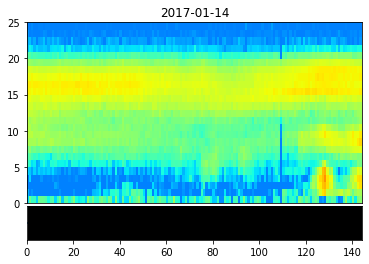

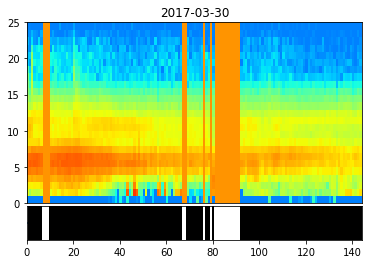

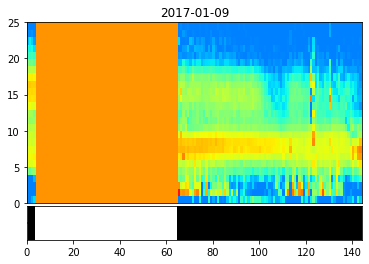

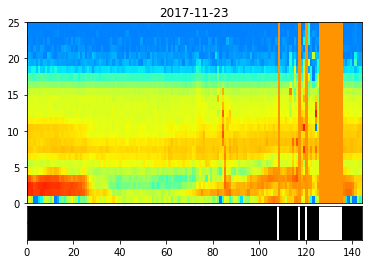

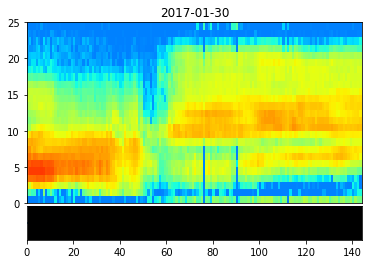

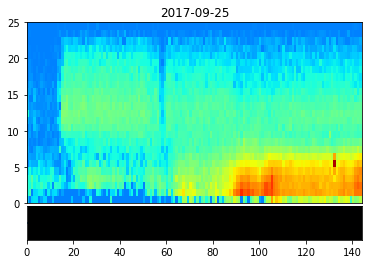

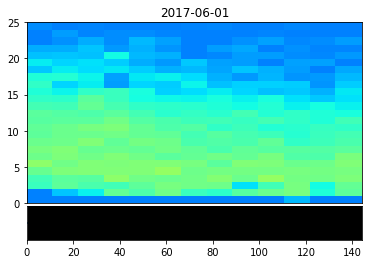

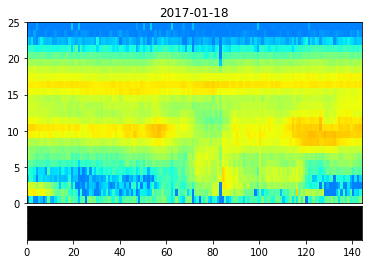

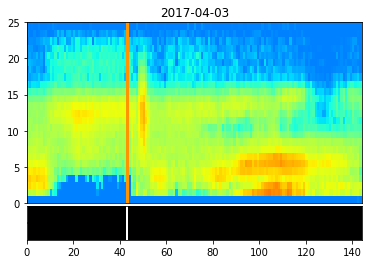

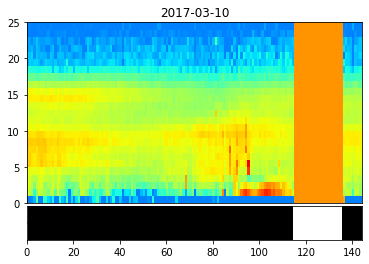

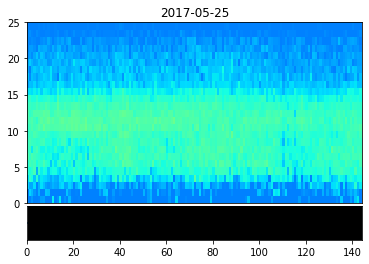

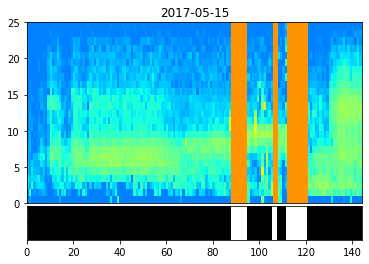

In [8]:
viz.visualize.generate_plots('neuronales', X_train, y_train)

In [7]:
y_test

{'mlf': '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/dmps_test_labels.mlf',
 'count': None,
 'id': '.test.real'}

In [33]:
from npfd.models.base import HiddenMarkovModel

model = HiddenMarkovModel()

model.initialize(X_train, params)

model.train(X_train, y_train, params)
results = model.test(X_test, y_test, params)



INFO:root:Initializing model...
INFO:root:Training the model...


Calculating Fixed Variance
  HMM Prototype: /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/proto
  Segment Label: None
  Num Streams  : 1
  UpdatingMeans: Yes
  Target Direct: /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/0
34014 speech frames accumulated
Updating HMM Means and Covariances
Output written to directory /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/0
Var floor macros output to file /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/0/vFloors

/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks
Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Testing model: 3


Pruning-Off

Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/3/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/3/hmmdefs -p 0.0000000000 -s 0.0000000000 -A -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Wed Mar 10 19:02:47 2021
  Ref : >ad/Tesis/models/bdb/npfd/data/../../data/inte

In [35]:
final_results = model.predict(X_test, params)
viz.visualize.generate_plots('final_resultos', X_train, final_results)

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/3/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/hmm/3/hmmdefs -A -p 0.0000000000 -s 0.0000000000 -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/classes/ -J /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../models/xforms/ mllr1 -h */%* -k -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/wdnet -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/test_D_A.real.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../data/interim/results.mlf /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/./HTK/misc/mo

IndexError: list index out of range

In [36]:
final_results

{'mlf': '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/../../data/interim/results.mlf'}

viz.visualize.generate_plots('real_data', X_test, y_test, results)

In [2]:
fi = '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/train_D_A' + f'/20170302'
viz.visualize.plot_X(fi)

_, obs, delta, acc = read_data(fi)
obs.boxplot()

NameError: name 'viz' is not defined

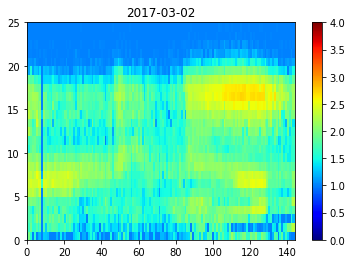

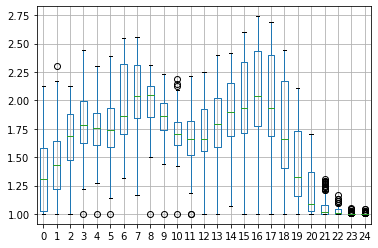

In [88]:
fi = X_adapt['script_file'][:-4] + f'/20170302'
viz.visualize.plot_X(fi)

_, obs, delta, acc = read_data(fi)

obs.boxplot()

In [22]:
X_train

{'script_file': '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/data/../../data/interim/train_D_A.real.scp',
 'count': 1,
 'id': 'train_D_A.real'}